# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("Dataset_clustering.csv")

df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**


Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### 1. **Memahami Struktur Data**

In [3]:
# Menampilkan jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

# Menampilkan informasi tipe data
print("\nInformasi Dataset:")
print(df.info())

# Menampilkan 5 data pertama
print("\nContoh Data:")
df.head()

Jumlah Baris: 8999910
Jumlah Kolom: 11

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB
None

Contoh Data:


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [4]:
# Mengambil subset dataset secara acak karena dataset terlalu besar, disini saya mengambil 100k data
df = df.sample(n=100000, random_state=69, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  int64  
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.4+ MB


**Ringkasan Struktur Data**

- **Jumlah Baris:** 100000
- **Jumlah Kolom:** 11  

**Informasi Dataset**  
- Dataset memiliki 11 kolom dengan tipe data sebagai berikut:  
  - **7 kolom kategorikal:** `Order_ID`, `Customer_Type`, `Product`, `Category`, `Region`, `Order_Date`
  - **4 kolom numerik:** `Unit_Price` (float), `Quantity` (int64), `Discount` (float), dan `Total_Price` (float)  
  - Disini harusnya kolom `Order_Date` bertipe **datetime** namun masih menggunakan tipe data **object**
- Tidak terdapat **missing values** pada dataframe berikut 

#### 2. **Menangani Data yang Hilang**

In [5]:
# Mengecek jumlah missing values per kolom
missing_values = df.isnull().sum()

# Menampilkan hanya kolom yang memiliki missing values
missing_values = missing_values[missing_values > 0]

# Menampilkan jumlah dan persentase missing values
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase (%)': missing_percentage})

print("Data yang Hilang:")
print(missing_data)

Data yang Hilang:
Empty DataFrame
Columns: [Jumlah Missing, Persentase (%)]
Index: []


**Ringkasan Data Yang Hilang**

Berdasarkan hasil analisis, bahwa tidak ditemukan data yg hilang atau *missing value* pada dataframe berikut, atau *missing value* = **0**

#### 3. **Analisis Distribusi dan Korelasi**  

In [6]:
# Menampilkan statistik deskriptif variabel numerik
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.773509,23.236670,0.030060,132.579773
std,14.552819,26.929755,0.044981,524.241820
min,0.320000,1.000000,0.000000,0.320000
25%,1.050000,6.000000,0.000000,8.400000
50%,1.750000,11.000000,0.000000,21.140000
75%,3.210000,31.000000,0.050000,70.212500
max,159.800000,100.000000,0.150000,12817.750000


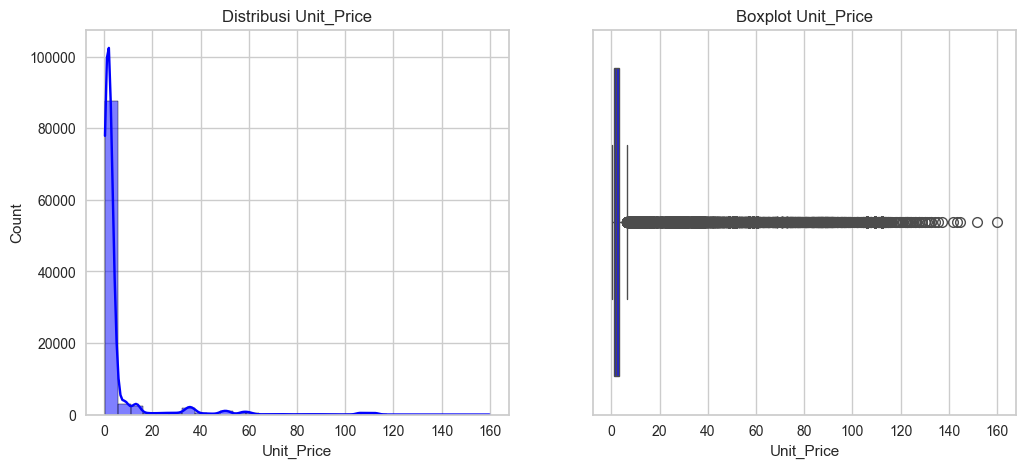

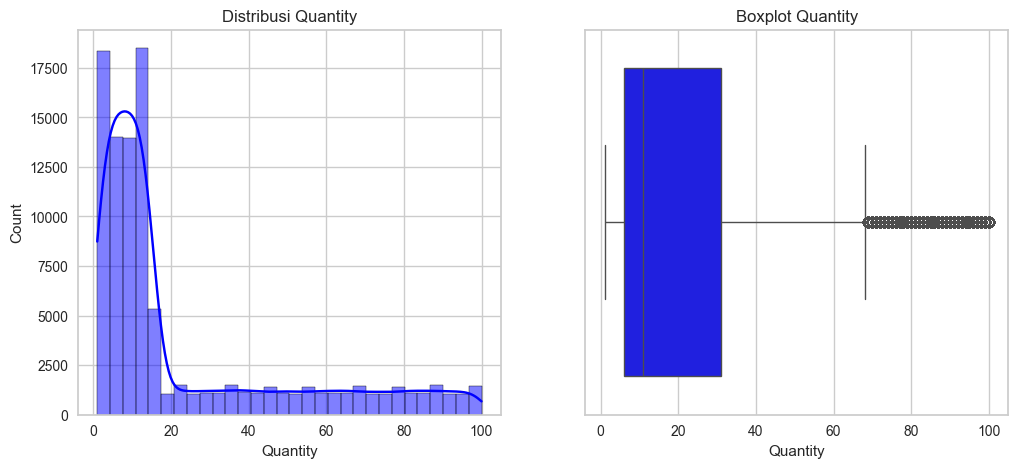

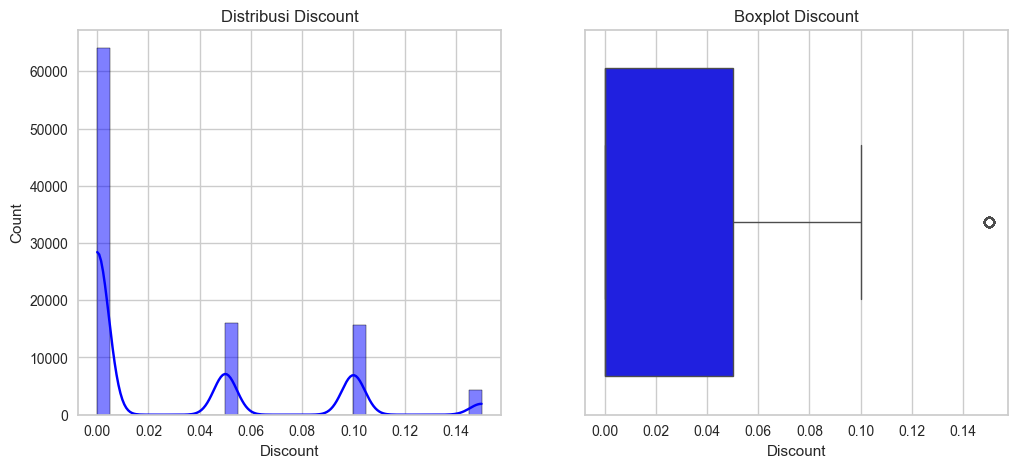

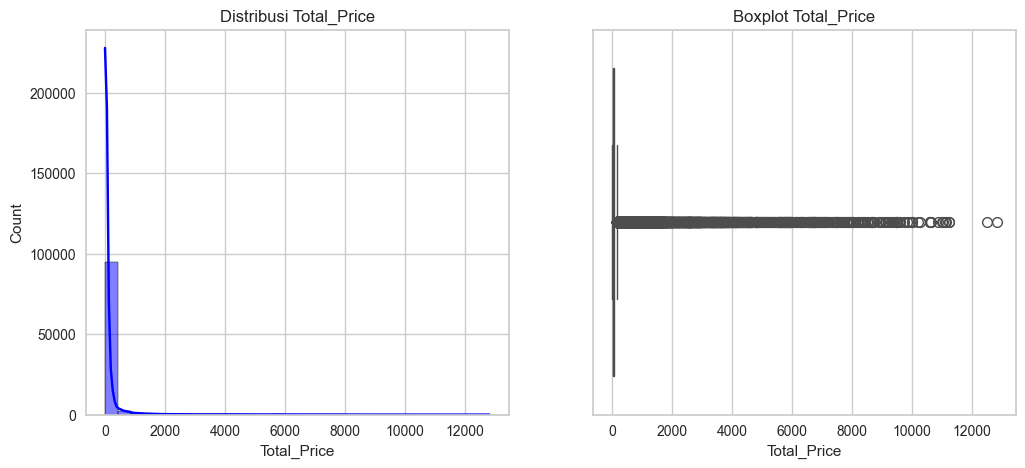

In [12]:
# Pilih hanya kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns

# Visualisasi histogram dan boxplot untuk setiap variabel numerik
for col in num_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Boxplot {col}')

    plt.show()

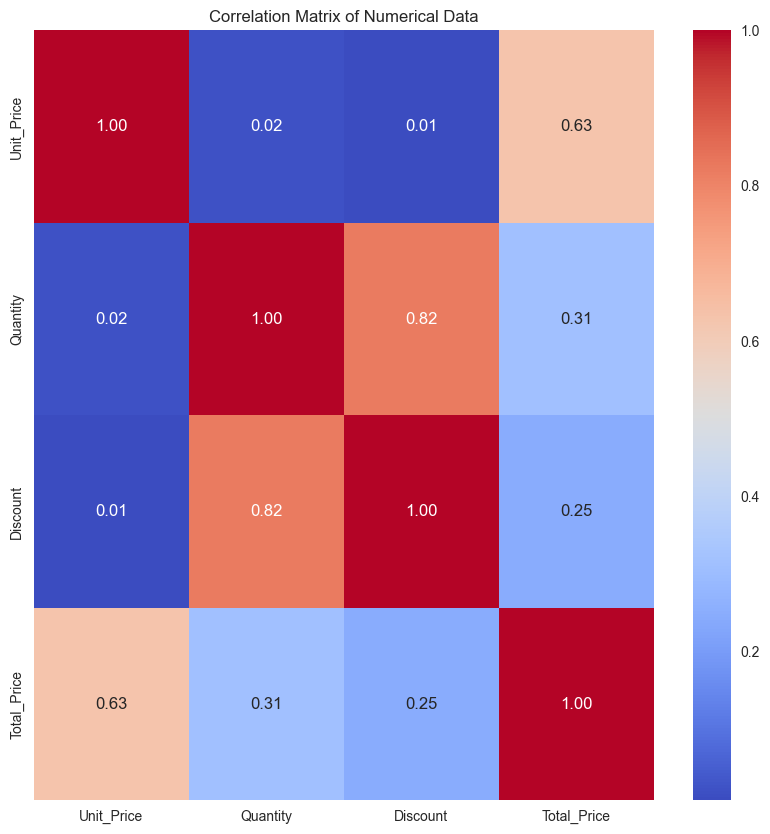

In [13]:
# Memeriksa hubungan atau korelasi antara variabel dengan matriks korelasi dan visualisasi dengan heatmap pada data numerik
plt.figure(figsize=(10, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Data')
plt.show()

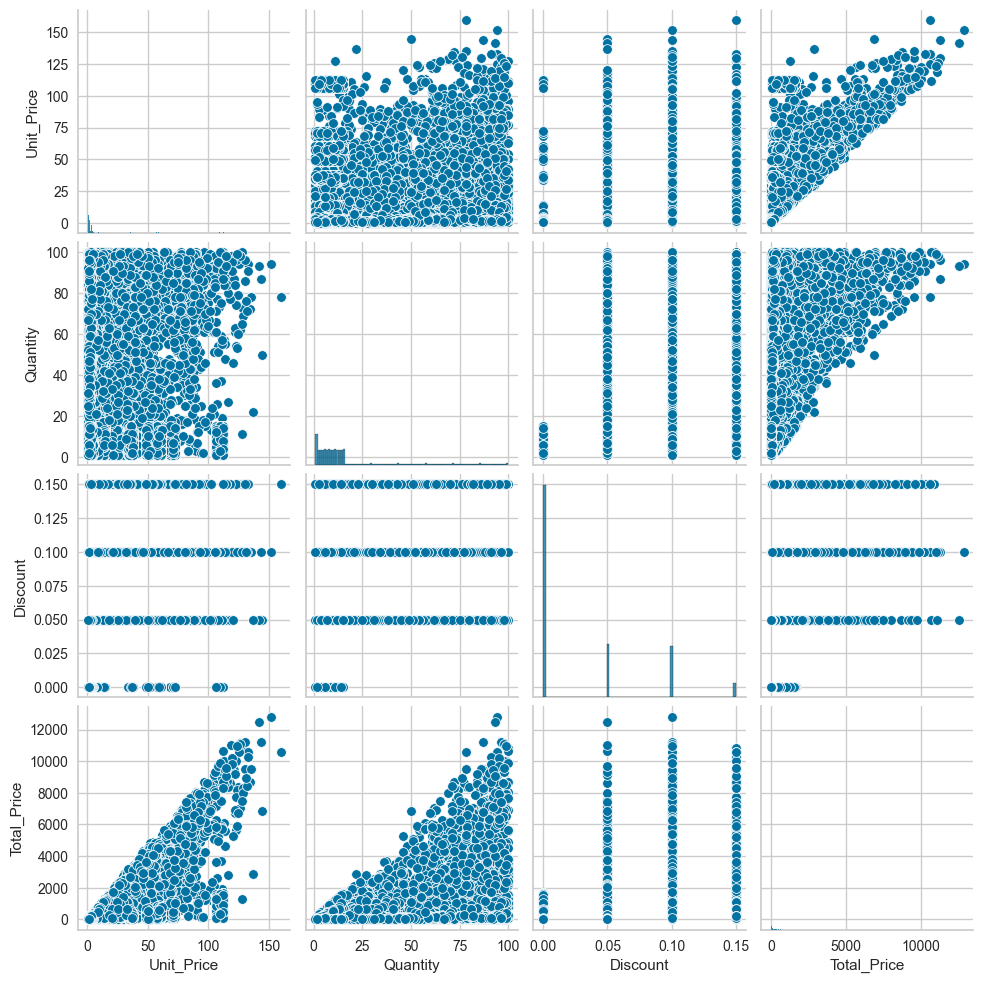

In [15]:
# Memeriksa hubungan antara variabel dengan pairplot pada data numerik
sns.pairplot(df[numeric_columns])
plt.show()

**Ringkasan Analisis Distribusi dan Korelasi**

- **Semua kolom numerik memiliki outlier**,yang perlu dianalisis lebih lanjut untuk menentukan dampaknya terhadap model atau analisis lainnya.
- **Hubungan antar variabel yang sama bernilai 1.00**, seperti yang diharapkan.

#### 4. **Visualisasi Data**  

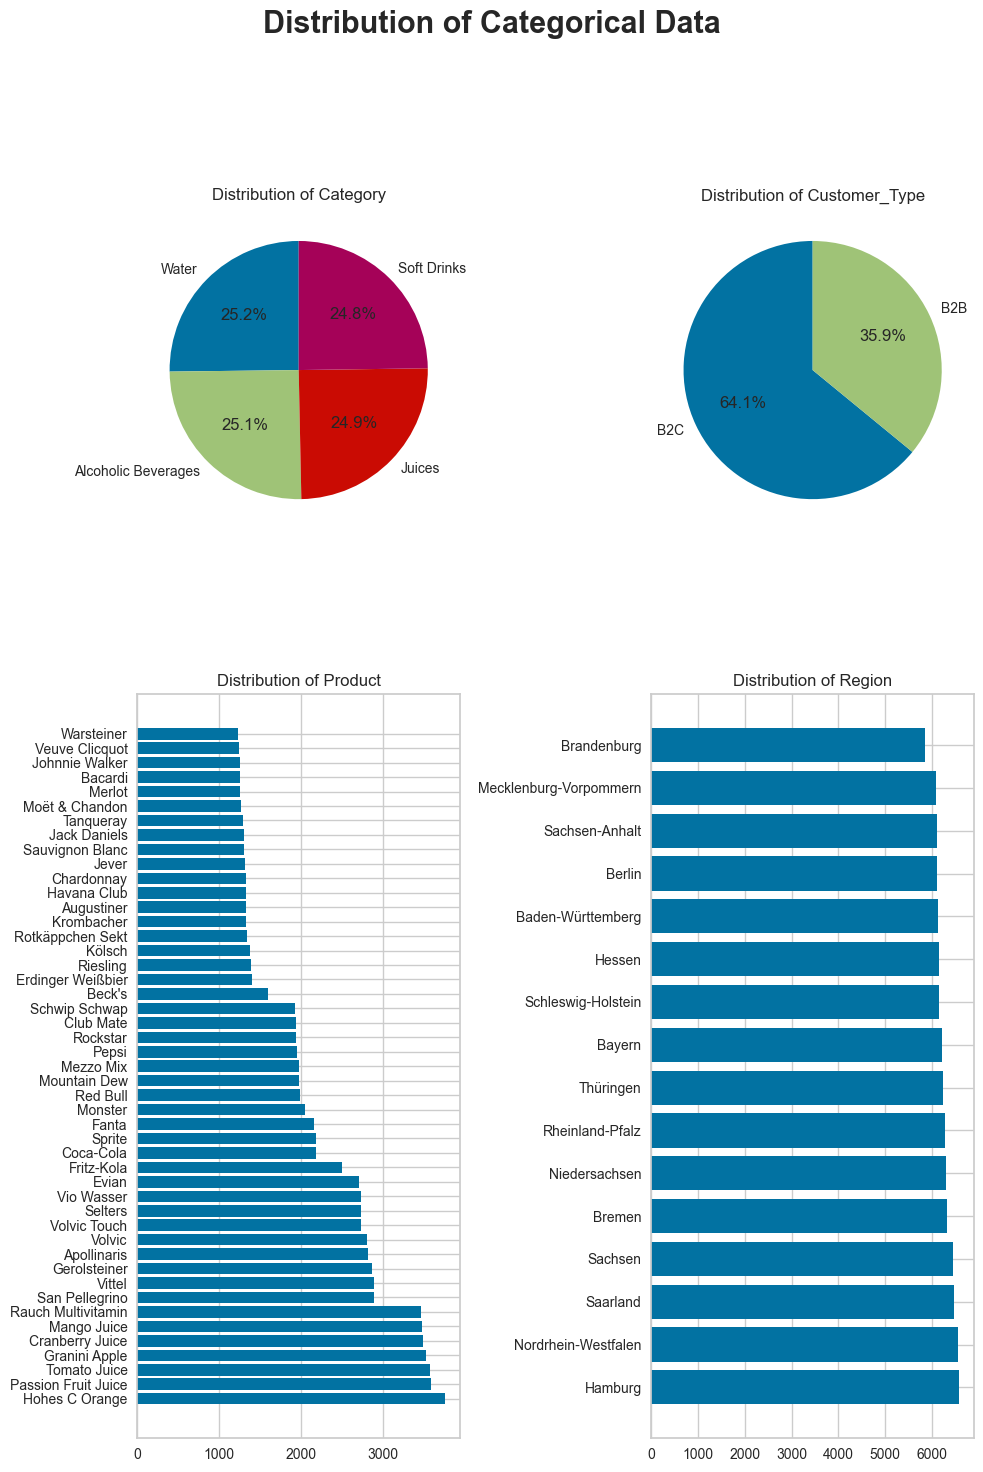

In [16]:
# Ambil nama kolom data kategorikal
categorical_columns = ['Category','Customer_Type','Product','Region']

# Visualisasikan distribusi data kategorikal
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

# Diagram distribusi Category
category_count = df['Category'].value_counts()
axes[0,0].pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Category')

# Diagram distribusi Customer_Type
customer_type_count = df['Customer_Type'].value_counts()
axes[0,1].pie(customer_type_count, labels=customer_type_count.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribution of Customer_Type')

# Diagram distribusi Customer_Type
product_count = df['Product'].value_counts()
axes[1,0].barh(product_count.index, product_count.values)
axes[1,0].set_title('Distribution of Product')

# Diagram distribusi Region
region_count = df['Region'].value_counts()
axes[1,1].barh(region_count.index, region_count.values)
axes[1,1].set_title('Distribution of Region')

plt.tight_layout()
plt.suptitle("Distribution of Categorical Data", fontsize=22, fontweight='bold')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

##### 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [17]:
print("Jumlah data kosong per kolom:")
df.isnull().sum()

Jumlah data kosong per kolom:


Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

**Pengecekan Missing Value**    
Tidak ditemukan *missing value* maka langsung kita lanjutkan ke tahap selanjutnya.

##### 2. Menghapus Data Duplikat

In [18]:
# Mengecek duplikasi
duplicates = df.duplicated()

# Menampilkan jumlah data duplikat
print(f"Jumlah data duplikat: {duplicates.sum()}")

Jumlah data duplikat: 0


**Pengecekan Duplikasi**    
Setelah dilakukan pengecekan, hasilnya menunjukkan bahwa **tidak terdapat data duplikat** atau 0 pada dataset. Oleh karena itu, proses dapat langsung dilanjutkan ke tahap berikutnya.

##### 3. Normalisasi atau Standarisasi Fitur

In [19]:
# Mengnisialisasi fungsi normalisasi dan standarisasi
min_max_scaler = MinMaxScaler() # normalisasi
standard_scaler = StandardScaler() # standarisasi

In [20]:
# Menormalisasi data
df_normalized = df.copy()
df_normalized[['Quantity']] = min_max_scaler.fit_transform(df_normalized[['Quantity']])
df_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28


In [21]:
# Menyandarisasi data
df_standardized = df_normalized.copy()
df_standardized[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(df_standardized[['Total_Price', 'Unit_Price']])
df_standardized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.197455,0.727273,0.05,0.130723,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28


**Hasil Normalisasi dan Standarisasi**
- **Kolom `Quantity`**  
  - Telah dinormalisasi menggunakan **MinMaxScaler** sehingga nilai berada pada rentang **0 hingga 1**.  
- **Kolom `Total_Price` dan `Unit_Price`**  
  - Telah distandarisasi menggunakan **StandardScaler** sehingga nilai berpusat di sekitar **0** dengan standar deviasi **1**.
- **Kolom `Discount`**
  - Tidak dinormalisasi atau distandarisasi serta lebih baik dibiarkan dalam bentuk aslinya karena sudah dalam skala yang seragam, memiliki makna bisnis yang jelas, dan normalisasi tidak akan memberikan manfaat signifikan.

##### 4. Deteksi dan Penanganan Outlier

In [22]:
# Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan rentang interkuartil (IQR) untuk kolom numerik
Q1 = df_standardized[numeric_columns].quantile(0.25)  # Kuartil 1 (25%)
Q3 = df_standardized[numeric_columns].quantile(0.75)  # Kuartil 3 (75%)
IQR = Q3 - Q1  # Rentang interkuartil (IQR)

# Menetapkan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

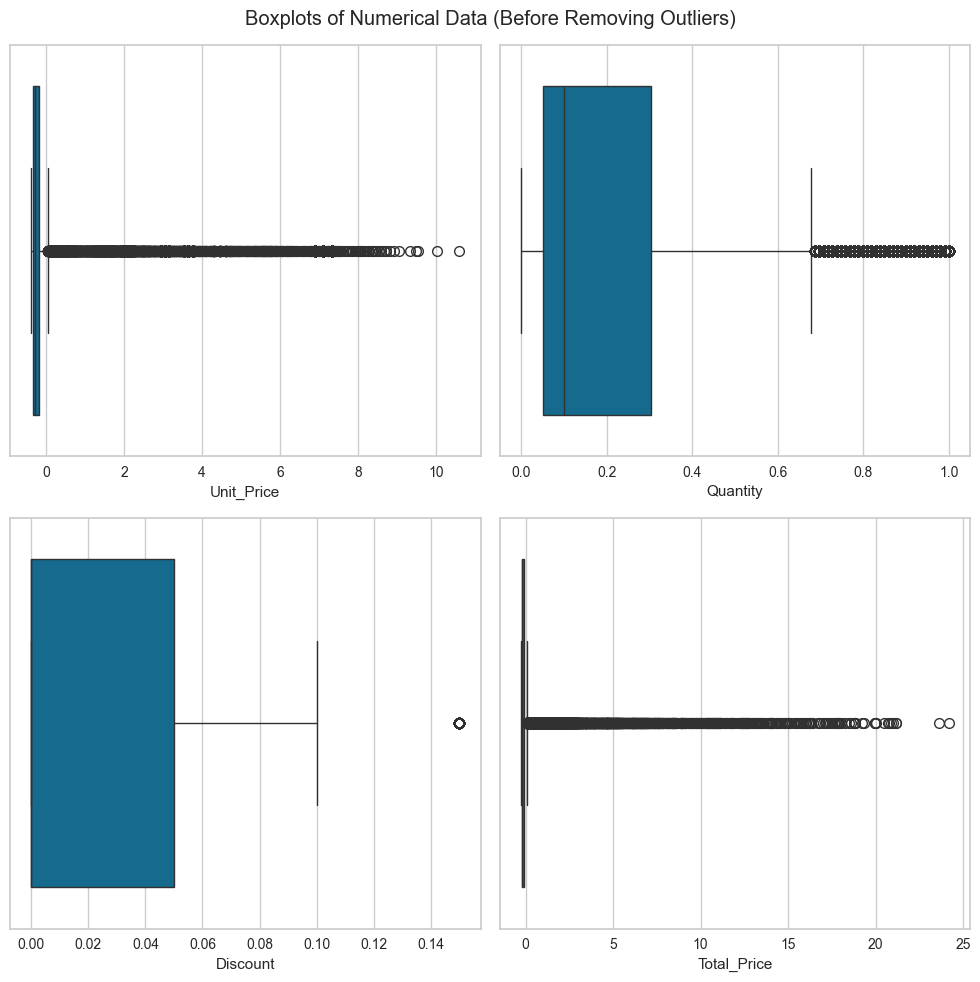

Jumlah data sebelum menghapus outlier: 100000


In [23]:
# Membuat boxplot untuk menampilkan distribusi data sebelum menghapus outlier
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Membuat grid subplot 2x2 dengan ukuran 10x10

# Loop untuk membuat boxplot setiap kolom numerik
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_standardized[col], ax=axes[i // 2, i % 2])  # Menampilkan boxplot di posisi yang sesuai

# Menambahkan judul utama pada plot
plt.suptitle("Boxplots of Numerical Data (Before Removing Outliers)")

# Menyesuaikan tata letak agar tidak saling bertumpukan
plt.tight_layout()

# Menampilkan plot
plt.show()

# Menampilkan jumlah data sebelum proses penghapusan outlier
print("Jumlah data sebelum menghapus outlier:", df_standardized.shape[0])

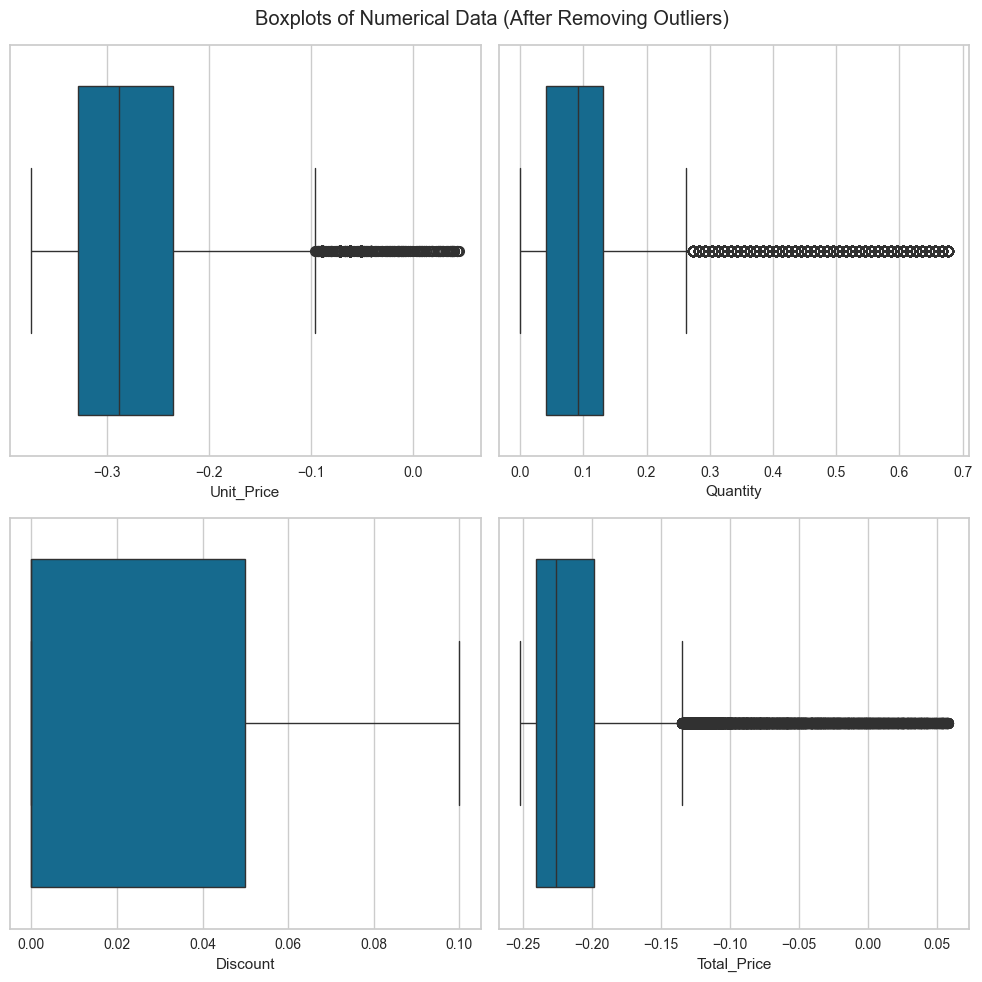

Jumlah data setelah menghapus outlier: 75948


In [24]:
# Menyaring data dengan menghapus outlier dari kolom numerik
mask = ~((df_standardized[numeric_columns] < lower_bound) | (df_standardized[numeric_columns] > upper_bound)).any(axis=1)
df_cleaned = df_standardized[mask]  # Membuat dataset baru tanpa outlier

# Menampilkan boxplot setelah proses penghapusan outlier
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Membuat grid subplot 2x2 dengan ukuran 10x10

# Loop untuk menampilkan boxplot setiap kolom numerik setelah outlier dihapus
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i // 2, i % 2])  # Menempatkan plot sesuai grid

# Menambahkan judul utama pada plot
plt.suptitle("Boxplots of Numerical Data (After Removing Outliers)")

# Menyesuaikan tata letak agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

# Menampilkan jumlah data setelah outlier dihapus
print("Jumlah data setelah menghapus outlier:", df_cleaned.shape[0])

##### 5. Encoding Data Kategorikal

In [25]:
# Inisialisasi objek LabelEncoder untuk mengubah data kategori menjadi angka
label_encoder = LabelEncoder()

# Membuat salinan dataset yang telah dibersihkan
df_labeled = df_cleaned.copy()

# Menerapkan label encoding pada kolom kategori tertentu
df_labeled[['Category', 'Region', 'Product']] = df_cleaned[['Category', 'Region', 'Product']].apply(label_encoder.fit_transform)

# Menerapkan one-hot encoding pada kolom 'Customer_Type'
df_encoded = pd.get_dummies(df_labeled, columns=['Customer_Type'])

# Menampilkan lima baris pertama dari dataset yang telah dikodekan
df_encoded.head()


,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD697566,CUS6363,5,2,-0.325266,0.060606,0.00,-0.239013,4,2021-02-17,False,True
1,ORD1118443,CUS7797,32,3,-0.347942,0.454545,0.10,-0.196837,13,2023-04-15,True,False
3,ORD1437128,CUS6393,20,2,-0.212572,0.292929,0.05,-0.107203,14,2021-09-07,True,False
4,ORD562794,CUS4090,29,3,-0.334199,0.020202,0.00,-0.247692,6,2023-04-28,False,True
5,ORD2320519,CUS5936,2,0,-0.299841,0.030303,0.00,-0.242141,4,2023-11-01,False,True


**Encoding Data Kategorial**

1. **Label Encoding**: Mengonversi nilai kategori dalam kolom *Category*, *Region*, dan *Product* menjadi angka menggunakan `LabelEncoder()`.  
2. **One-Hot Encoding**: Mengubah kolom *Customer_Type* menjadi beberapa kolom biner menggunakan `pd.get_dummies()`, sehingga setiap kategori direpresentasikan dengan nilai 0 atau 1.  
3. **Hasil Akhir**: Dataset yang sudah dikodekan siap untuk digunakan dalam analisis atau pelatihan model.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [26]:
# Menentukan fitur yang akan digunakan sebagai variabel independen (X)
features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Customer_Type_B2B', 'Customer_Type_B2C']

# Memilih kolom yang sesuai dari dataset yang telah dikodekan
X = df_encoded[features]

# Menampilkan dataset fitur yang telah dipilih
X

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C
0,-0.325266,0.060606,0.00,-0.239013,False,True
1,-0.347942,0.454545,0.10,-0.196837,True,False
3,-0.212572,0.292929,0.05,-0.107203,True,False
4,-0.334199,0.020202,0.00,-0.247692,False,True
5,-0.299841,0.030303,0.00,-0.242141,False,True
...,...,...,...,...,...,...
99992,-0.241433,0.131313,0.00,-0.192545,False,True
99993,-0.287472,0.050505,0.00,-0.234702,False,True
99995,-0.317020,0.050505,0.00,-0.239623,False,True
99997,-0.353439,0.000000,0.00,-0.251698,False,True


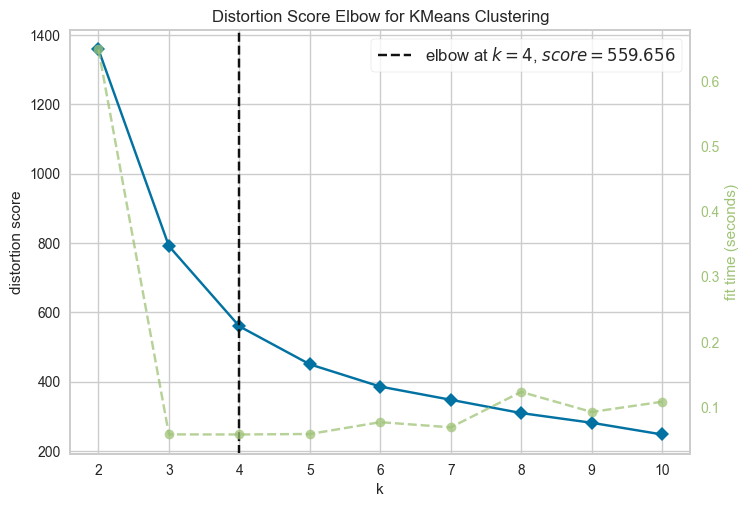

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Membuat instance model KMeans tanpa parameter awal
kmeans = KMeans()

# Menginisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal dalam rentang 2 hingga 11
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Melatih (fit) visualizer dengan dataset untuk menemukan jumlah cluster yang ideal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis jumlah cluster optimal
visualizer.show()

In [28]:
# Mengurangi dimensi data menjadi 2 menggunakan PCA untuk memudahkan visualisasi
pca = PCA(n_components=2)

# Menerapkan PCA pada dataset dan mengonversinya ke dalam dua dimensi
X_pca = pca.fit_transform(X)

In [29]:
# Mengambil jumlah cluster optimal berdasarkan metode Elbow
optimal_k = visualizer.elbow_value_

# Melatih model K-Means dengan jumlah cluster optimal yang telah ditemukan
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')

# Melakukan proses clustering pada data yang telah direduksi dimensinya menggunakan PCA
kmeans.fit(X_pca)

KMeans(n_clusters=np.int64(4), random_state=69)

**Ringkasan Proses Pembangunan Model Clustering**  

1. **Pemilihan Fitur**  
   - Data difokuskan pada fitur-fitur penting seperti harga satuan, kuantitas, diskon, total harga, serta jenis pelanggan (B2B/B2C).  

2. **Menentukan Jumlah Cluster Optimal**  
   - Metode **Elbow** digunakan untuk menemukan jumlah cluster terbaik dalam rentang 2-11.  
   - Hasil analisis menunjukkan bahwa **4 cluster** adalah jumlah optimal.  

3. **Reduksi Dimensi dengan PCA**  
   - Principal Component Analysis (**PCA**) digunakan untuk mengurangi dimensi data menjadi 2, sehingga lebih mudah divisualisasikan.  

4. **Clustering dengan K-Means**  
   - Model **K-Means** dilatih menggunakan **4 cluster**, dengan inisialisasi **k-means++** dan `random_state=69` untuk memastikan hasil yang konsisten.  
   - Output menunjukkan bahwa data telah berhasil dikelompokkan ke dalam **4 segmen** berbeda berdasarkan pola pembelian pelanggan.  

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [30]:
# Menghitung Silhouette Score  
sil_score = silhouette_score(X_pca, kmeans.labels_)

# Menampilkan hasil Silhouette Score untuk jumlah cluster yang telah dipilih  
print(f'Silhouette Score untuk K={optimal_k}: {sil_score}')

Silhouette Score untuk K=4: 0.8656863559851897


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
# Pastikan hanya mengambil kolom numerik sebelum menghitung korelasi
df_numeric = df_encoded.select_dtypes(include=[np.number])

# Hitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df_numeric.corr()

# Pilih fitur yang memiliki korelasi dengan Total_Price lebih dari 0.3
selected_features = correlation_matrix['Total_Price'][abs(correlation_matrix['Total_Price']) > 0.2].index.tolist()

# Memastikan fitur yang dipilih tidak termasuk target
selected_features.remove('Total_Price')

# Pilih fitur yang telah disaring
X_selected = df_encoded[selected_features]

In [32]:
# Reduksi dimensi dengan PCA jika masih banyak fitur
pca = PCA(n_components=2)
X_pca_selected = pca.fit_transform(X_selected)

# Clustering ulang dengan jumlah cluster optimal
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans_selected.fit(X_pca_selected)

# Evaluasi dengan Silhouette Score
sil_score_selected = silhouette_score(X_pca_selected, kmeans_selected.labels_)
print(f'Silhouette Score setelah Feature Selection (K={optimal_k}): {sil_score_selected}')

Silhouette Score setelah Feature Selection (K=4): 0.8618697132926402


In [33]:
print(f'Sebelum Feature Selection: {sil_score}')
print(f'Sesudah Feature Selection: {sil_score_selected}')

Sebelum Feature Selection: 0.8656863559851897
Sesudah Feature Selection: 0.8618697132926402


**Kesimpulan Feature Selection**  

Dari hasil eksperimen, penerapan **Feature Selection** tidak memberikan dampak signifikan terhadap performa model clustering berdasarkan **Silhouette Score**:  

- **Sebelum Feature Selection**: **0.8656**  
- **Sesudah Feature Selection**: **0.8619**  

**Poin-Poin Utama**:  
- Performa model tetap stabil meskipun jumlah fitur dikurangi.  
- Feature Selection membantu menyederhanakan model, mengurangi dimensi data, dan meningkatkan efisiensi komputasi.  
- Pemilihan fitur yang tepat tetap perlu dipertimbangkan agar tidak menghilangkan informasi penting untuk clustering. 

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

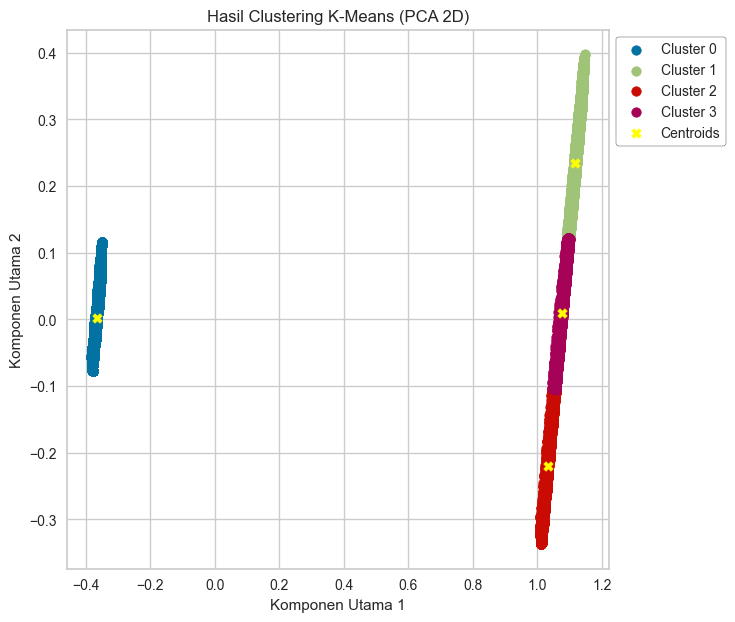

In [34]:
# Memvisualisasikan hasil clustering
plt.figure(figsize=(7, 7))

# Plot masing-masing cluster
for cluster in range(4):
    plt.scatter(X_pca[kmeans.labels_ == cluster, 0], X_pca[kmeans.labels_ == cluster, 1], label=f'Cluster {cluster}')

# Plot titik pusat (centroid) setiap cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', marker='X', label='Centroids')

# Menambahkan judul dan label sumbu
plt.title('Hasil Clustering K-Means (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')

# Menampilkan legenda di sudut kanan atas dengan bingkai
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')

# Menampilkan plot
plt.show()

**Visualisasi Hasil Clustering**

Visualisasi clustering dengan K-Means dan PCA 2D menunjukkan pembagian data ke dalam empat cluster yang ditandai dengan warna berbeda, dengan centroid ditandai **X** kuning. Jika cluster terlihat jelas, model bekerja dengan baik; jika tumpang tindih, perlu evaluasi lebih lanjut.

## **e. Analisis dan Interpretasi Hasil Cluster**

In [35]:
# Menambahkan hasil clustering ke dalam data setelah outlier diatasi
df_labeled = df_cleaned.copy()
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.299841,0.030303,0.00,-0.242141,Bremen,2023-11-01,0


In [36]:
# Mengembalikan nilai data numerik ke skala aslinya (sebelum normalisasi/standardisasi)
df_labeled[['Quantity']] = min_max_scaler.inverse_transform(df_labeled[['Quantity']])
df_labeled[['Total_Price', 'Unit_Price']] = standard_scaler.inverse_transform(df_labeled[['Total_Price', 'Unit_Price']])
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


Cluster
0    56636
2     6877
3     6604
1     5831
Name: count, dtype: int64 



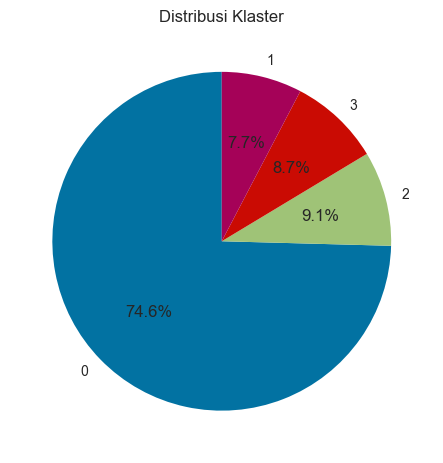

In [37]:
# Menghitung jumlah sampel dalam setiap klaster
jumlah_per_klaster = df_labeled['Cluster'].value_counts()
print(jumlah_per_klaster, '\n')

# Membuat visualisasi distribusi klaster
plt.pie(jumlah_per_klaster, labels=jumlah_per_klaster.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Klaster')
plt.show()

In [38]:
# Menghitung rata-rata, median, dan modus setiap fitur numerik berdasarkan klaster
mean_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()
median_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').median()
mode_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').agg(lambda x: x.mode().iloc[0])

# Menampilkan hasil
print("Mean Values:\n", mean_values, '\n')
print("Median Values:\n", median_values, '\n')
print("Mode Values:\n", mode_values, '\n')

Mean Values:
          Unit_Price   Quantity  Discount  Total_Price
Cluster                                              
0          1.844884   7.988188  0.000000    14.748905
1          1.625586  55.823701  0.078760    82.099283
2          1.532740  11.820125  0.059721    16.249724
3          1.608660  33.914749  0.066626    49.194571 

Median Values:
          Unit_Price  Quantity  Discount  Total_Price
Cluster                                             
0              1.61       8.0      0.00       11.160
1              1.44      56.0      0.10       74.900
2              1.21      12.0      0.05       12.170
3              1.32      34.0      0.05       42.605 

Mode Values:
          Unit_Price  Quantity  Discount  Total_Price
Cluster                                             
0              0.96       6.0      0.00        12.48
1              1.01      50.0      0.10        60.48
2              0.64       2.0      0.05        13.68
3              0.65      30.0      0.05      

Customer_Type   B2B    B2C
Cluster                   
0                 0  56636
1              5831      0
2              6877      0
3              6604      0 



<Figure size 700x700 with 0 Axes>

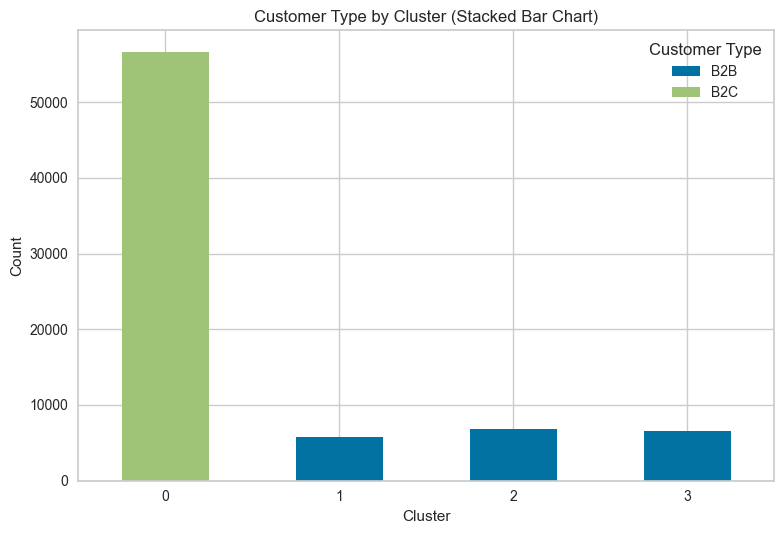

In [39]:
# Grup berdasarkan 'Cluster' dan 'Customer_Type' lalu hitung jumlah datanya
customer_type_and_cluster_counts = df_labeled.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)

# Tampilkan jumlah data per jenis pelanggan dalam setiap klaster
print(customer_type_and_cluster_counts, '\n')

# Visualisasi dengan diagram batang bertumpuk
plt.figure(figsize=(7, 7))
customer_type_and_cluster_counts.plot(kind='bar', stacked=True)
plt.title('Customer Type by Cluster (Stacked Bar Chart)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

---

#### **Cluster 0 - Pelanggan Retail (B2C - Business to Consumer)**
- **Jumlah Pelanggan**: **56,636 pelanggan** (paling besar dibanding klaster lain).  
- **Jenis Pelanggan**: Seluruhnya berasal dari **B2C (individu/retail customers)**.  
- **Unit Price (Harga Satuan)**: Rata-rata harga unit **1.84**, tertinggi di antara semua klaster, menunjukkan bahwa pelanggan di klaster ini membayar lebih mahal untuk produk yang mereka beli.  
- **Quantity (Jumlah Pembelian)**: Rata-rata pembelian hanya **7.99 unit**, yang menunjukkan bahwa pelanggan ini hanya membeli dalam jumlah kecil.  
- **Discount (Diskon yang Diterima)**: **0%**, tidak ada diskon yang diberikan kepada pelanggan ini, kemungkinan karena jumlah pembelian yang kecil.  
- **Total Price (Total Transaksi)**: **14.75**, transaksi yang cukup kecil dibanding klaster lain.  
- **Analisis Cluster 0**: 
  - Klaster ini merepresentasikan **pelanggan individu (retail)** yang membeli dalam jumlah kecil dengan harga yang lebih tinggi tanpa mendapatkan diskon.
  - Kemungkinan besar mereka adalah **pembeli eceran yang membeli sesuai kebutuhan** tanpa rencana pembelian dalam jumlah besar.  
- **Strategi yang bisa diterapkan**:  
  - Meningkatkan pembelian mereka dengan **program loyalitas atau promo bundling**.  
  - Memberikan **potongan harga atau promo khusus** agar pelanggan ini membeli dalam jumlah lebih besar.  

---

#### **Cluster 1 - Pembeli Grosir Menengah (B2B - Medium Wholesale Buyers)**
- **Jumlah Pelanggan**: **6,589 pelanggan** (lebih kecil dari Cluster 0, tetapi masih signifikan).  
- **Jenis Pelanggan**: Seluruhnya dari **B2B (Business-to-Business)**.  
- **Unit Price (Harga Satuan)**: **1.61**, lebih rendah dari klaster 0 karena mereka membeli dalam jumlah lebih besar.  
- **Quantity (Jumlah Pembelian)**: **34.07 unit**, pembelian dalam jumlah cukup besar dibanding klaster lain kecuali Cluster 3.  
- **Discount (Diskon yang Diterima)**: **6.67%**, menunjukkan bahwa pelanggan ini mendapat diskon lebih tinggi dibanding Cluster 2, tetapi lebih rendah dari Cluster 3.  
- **Total Price (Total Transaksi)**: **49.37**, cukup besar, menunjukkan bahwa pelanggan ini sering melakukan transaksi dalam jumlah menengah.  
- **Analisis Cluster 1**:
  - Klaster ini terdiri dari **pelanggan bisnis (B2B) skala menengah**, seperti toko kecil atau distributor yang melakukan pembelian dalam jumlah sedang.
  - Pelanggan ini sudah mendapatkan diskon yang cukup tinggi untuk meningkatkan volume pembelian mereka.  
- **Strategi yang bisa diterapkan**:  
  - Mendorong mereka untuk meningkatkan pembelian dengan menawarkan **diskon lebih tinggi untuk pembelian dalam jumlah tertentu**.  
  - Memberikan **fasilitas kredit atau cicilan** agar mereka bisa membeli lebih banyak tanpa terbebani biaya langsung.  

---

#### **Cluster 2 - Pembeli Grosir Kecil (B2B - Small Wholesale Buyers)**
- **Jumlah Pelanggan**: **6,929 pelanggan** (sedikit lebih besar dari Cluster 1).  
- **Jenis Pelanggan**: Seluruhnya dari **B2B (Business-to-Business)**.  
- **Unit Price (Harga Satuan)**: **1.53**, lebih rendah dibanding Cluster 1, kemungkinan karena pelanggan ini membeli produk dengan harga lebih terjangkau.  
- **Quantity (Jumlah Pembelian)**: **11.90 unit**, lebih rendah dibanding Cluster 1 tetapi lebih tinggi dari Cluster 0.  
- **Discount (Diskon yang Diterima)**: **5.97%**, lebih rendah dibanding Cluster 1 dan Cluster 3.  
- **Total Price (Total Transaksi)**: **16.38**, menunjukkan bahwa meskipun mereka membeli dalam jumlah lebih banyak dibanding Cluster 0, nilai transaksi mereka masih tergolong rendah.  
- **Analisis Cluster 2**  
  - Klaster ini terdiri dari **bisnis kecil yang membeli dalam jumlah terbatas**, mungkin untuk kebutuhan stok yang tidak terlalu besar.  
  - Mereka sudah mendapatkan sedikit diskon, tetapi karena volume pembelian mereka lebih kecil dibanding Cluster 1, diskon yang mereka terima juga lebih rendah.  
- **Strategi yang bisa diterapkan**:  
  - Mendorong mereka untuk beralih ke Cluster 1 dengan menawarkan **insentif atau bonus pembelian dalam jumlah lebih besar**.  
  - Memberikan **harga khusus untuk produk tertentu** agar mereka terdorong untuk meningkatkan volume pembelian.  

---

#### **Cluster 3 - Pembeli Grosir Besar (B2B - Large Wholesale Buyers)**
- **Jumlah Pelanggan**: **5,794 pelanggan** (paling sedikit dibanding klaster lainnya, tetapi dengan transaksi terbesar).  
- **Jenis Pelanggan**: Seluruhnya dari **B2B (Business-to-Business)**.  
- **Unit Price (Harga Satuan)**: **1.63**, mirip dengan Cluster 1, menunjukkan bahwa harga produk tetap kompetitif meskipun jumlah pembelian lebih besar.  
- **Quantity (Jumlah Pembelian)**: **55.89 unit**, paling tinggi dibanding semua klaster, menunjukkan bahwa pelanggan ini adalah pembeli dalam jumlah sangat besar.  
- **Discount (Diskon yang Diterima)**: **7.87%**, tertinggi dibanding semua klaster, sebagai bentuk insentif untuk pembelian dalam jumlah besar.  
- **Total Price (Total Transaksi)**: **82.23**, yang merupakan total transaksi terbesar di antara semua klaster.  
- **Analisis Cluster 3**  
  - Klaster ini terdiri dari **pelanggan bisnis berskala besar**, seperti distributor utama atau perusahaan yang membeli dalam jumlah besar untuk dijual kembali.  
  - Mereka mendapatkan diskon paling tinggi sebagai bentuk apresiasi atas volume pembelian mereka.  
- **Strategi yang bisa diterapkan**:  
  - Menjaga **hubungan bisnis yang kuat dengan mereka** dengan memberikan penawaran eksklusif atau diskon tambahan untuk loyalitas.  
  - Memberikan **keuntungan tambahan seperti pengiriman gratis atau prioritas stok** agar mereka tetap setia membeli dalam jumlah besar.  

---

#### **Kesimpulan Keseluruhan**
| Cluster | Jenis Pelanggan | Rata-rata Pembelian | Diskon | Harga Unit | Total Transaksi |  
|---------|----------------|---------------------|--------|------------|-----------------|  
| **0** | B2C - Retail | Kecil | 0% | Paling mahal | Kecil |  
| **1** | B2B - Medium Wholesale | Sedang | 6.67% | Lebih murah dari Cluster 0 | Sedang |  
| **2** | B2B - Small Wholesale | Kecil-Sedang | 5.97% | Lebih murah dari Cluster 1 | Kecil-Sedang |  
| **3** | B2B - Large Wholesale | Besar | 7.87% | Hampir sama dengan Cluster 1 | Paling besar |  

#### **Rekomendasi Strategi Bisnis Berdasarkan Klasterisasi**  
1. **Cluster 0 (Retail Customers)**  
   - Perkenalkan program loyalitas atau promo bundling.  
   - Gunakan strategi upselling dan cross-selling untuk meningkatkan jumlah pembelian.  

2. **Cluster 1 & 2 (Small-Medium B2B Buyers)**  
   - Berikan insentif tambahan untuk meningkatkan volume pembelian.  
   - Tawarkan program membership dengan harga spesial bagi mereka yang sering membeli.  

3. **Cluster 3 (Large Wholesale Buyers)**  
   - Berikan keuntungan eksklusif seperti layanan pengiriman gratis atau prioritas stok.  
   - Tawarkan kontrak bisnis jangka panjang dengan harga yang lebih kompetitif.  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
# Simpan hasil clustering ke dalam file CSV
df_labeled.to_csv('Dataset_inisiasi.csv', index=False)
print("Dataset berhasil disimpan sebagai 'Dataset_inisiasi.csv'.")

Dataset berhasil disimpan sebagai 'Dataset_inisiasi.csv'.
